<a href="https://colab.research.google.com/github/SykoTheKiD/CTCIPython/blob/master/Housing_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import pandas as pd
import keras
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

TRAIN = "gdrive/My Drive/Datasets/House/train.csv"
TEST = "gdrive/My Drive/Datasets/House/test.csv"

In [0]:
train_df = pd.read_csv(TRAIN)
test_df = pd.read_csv(TEST)
ntrain = train_df.shape[0]
train_id = train_df['Id']
test_id = test_df['Id']
train_df.drop("Id", axis = 1, inplace = True)
test_df.drop("Id", axis = 1, inplace = True)
y_train = train_df.SalePrice.values
print("Shape Train", train_df.shape)
print("Shape Test", test_df.shape)
all_data = pd.concat((train_df, test_df)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("Merged:", all_data.shape)

Shape Train (1460, 80)
Shape Test (1459, 79)
Merged: (2919, 79)


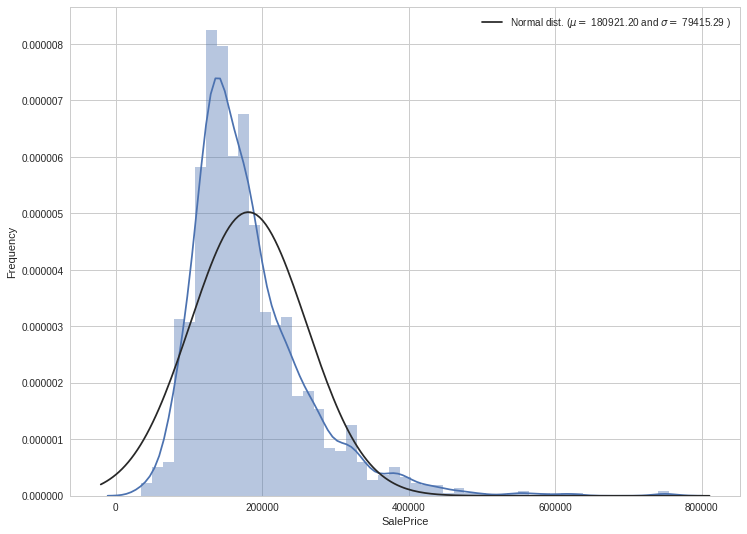

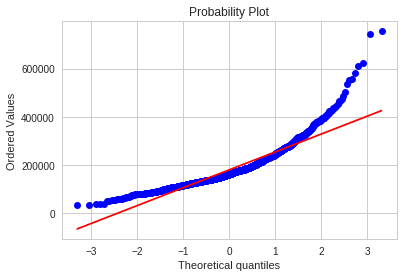

In [0]:
plt.subplots(figsize=(12,9))
sns.distplot(train_df['SalePrice'], fit=stats.norm)

# Get the fitted parameters used by the function

(mu, sigma) = stats.norm.fit(train_df['SalePrice'])

# plot with the distribution

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

#Probablity plot

fig = plt.figure()
stats.probplot(train_df['SalePrice'], plot=plt)
plt.show()

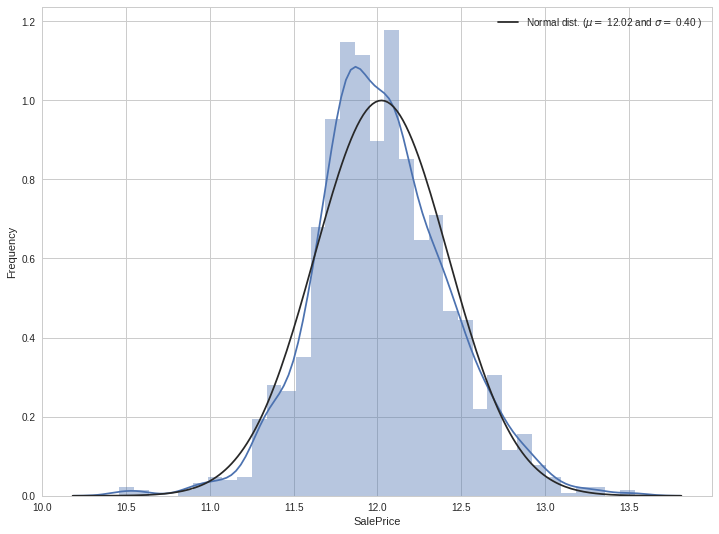

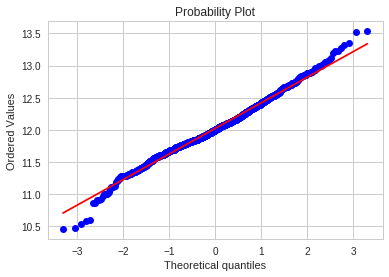

In [0]:
train_df['SalePrice'] = np.log1p(train_df['SalePrice'])

#Check again for more normal distribution

plt.subplots(figsize=(12,9))
sns.distplot(train_df['SalePrice'], fit=stats.norm)

# Get the fitted parameters used by the function

(mu, sigma) = stats.norm.fit(train_df['SalePrice'])

# plot with the distribution

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

#Probablity plot

fig = plt.figure()
stats.probplot(train_df['SalePrice'], plot=plt)
plt.show()

In [0]:
Isnull = all_data.isnull().sum()/len(all_data)*100
Isnull = Isnull[Isnull>0]
Isnull.sort_values(inplace=True, ascending=False)
print(Isnull)

PoolQC          99.657417
MiscFeature     96.402878
Alley           93.216855
Fence           80.438506
FireplaceQu     48.646797
LotFrontage     16.649538
GarageQual       5.447071
GarageCond       5.447071
GarageFinish     5.447071
GarageYrBlt      5.447071
GarageType       5.378554
BsmtExposure     2.809181
BsmtCond         2.809181
BsmtQual         2.774923
BsmtFinType2     2.740665
BsmtFinType1     2.706406
MasVnrType       0.822199
MasVnrArea       0.787941
MSZoning         0.137033
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
Utilities        0.068517
Functional       0.068517
Electrical       0.034258
BsmtUnfSF        0.034258
Exterior1st      0.034258
Exterior2nd      0.034258
TotalBsmtSF      0.034258
GarageArea       0.034258
GarageCars       0.034258
BsmtFinSF2       0.034258
BsmtFinSF1       0.034258
KitchenQual      0.034258
SaleType         0.034258
dtype: float64


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


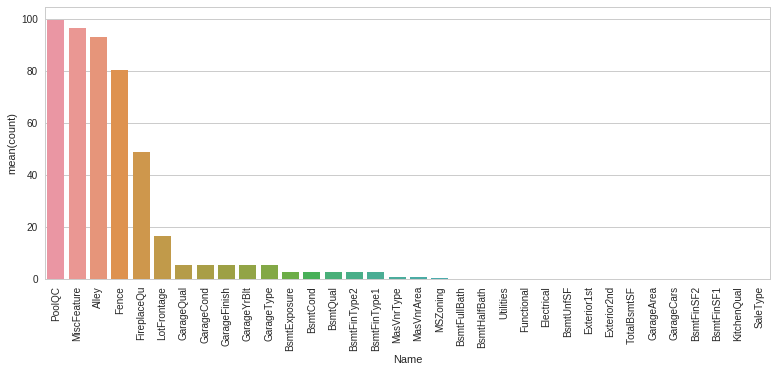

In [0]:
Isnull = Isnull.to_frame()
Isnull.columns = ['count']
Isnull.index.names = ['Name']
Isnull['Name'] = Isnull.index

plt.figure(figsize=(13, 5))
sns.set(style='whitegrid')
sns.barplot(x='Name', y='count', data=Isnull)
plt.xticks(rotation = 90)
plt.show()

In [0]:
corr = train_df.corr()
corr.sort_values(['SalePrice'], ascending=False, inplace=True)
corr.SalePrice

SalePrice        1.000000
OverallQual      0.817185
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
GarageYrBlt      0.541073
TotRmsAbvGrd     0.534422
Fireplaces       0.489450
MasVnrArea       0.430809
BsmtFinSF1       0.372023
LotFrontage      0.355879
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209043
ScreenPorch      0.121208
PoolArea         0.069798
MoSold           0.057330
3SsnPorch        0.054900
BsmtFinSF2       0.004832
BsmtHalfBath    -0.005149
MiscVal         -0.020021
OverallCond     -0.036868
YrSold          -0.037263
LowQualFinSF    -0.037963
MSSubClass      -0.073959
KitchenAbvGr    -0.147548
EnclosedPorch   -0.149050
Name: SalePrice, dtype: float64

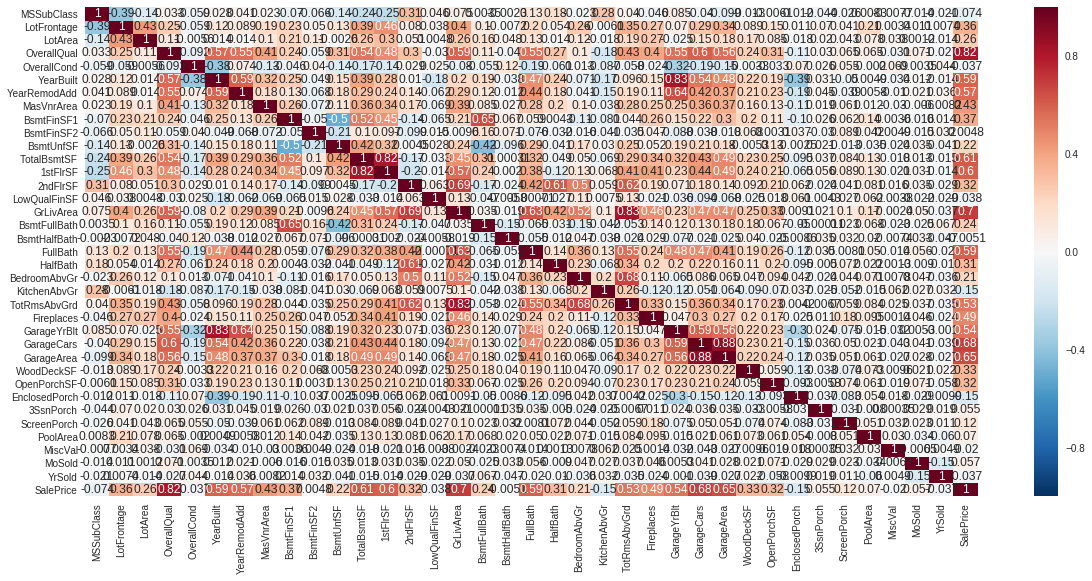

In [0]:
corr = train_df.corr()
plt.subplots(figsize=(20,9))
sns.heatmap(corr, annot=True)

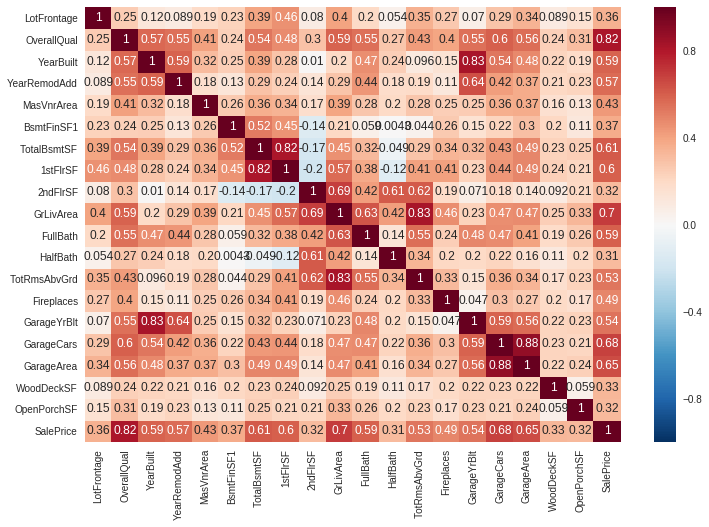

In [0]:
train_corr = train_df.select_dtypes(include=[np.number])
corr = train_corr.corr()
top_feature = corr.index[abs(corr['SalePrice']>0.3)]
plt.subplots(figsize=(12, 8))
top_corr = train_df[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

In [0]:
all_data['PoolQC'] = all_data['PoolQC'].fillna('None')
all_data['MiscFeature'] = all_data['MiscFeature'].fillna('None')
all_data['Alley'] = all_data['Alley'].fillna('None')
all_data['Fence'] = all_data['Fence'].fillna('None')
all_data['FireplaceQu'] = all_data['FireplaceQu'].fillna('None')
all_data['LotFrontage'] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    all_data[col] = all_data[col].fillna('None')
for col in ['GarageYrBlt', 'GarageArea', 'GarageCars']:
    all_data[col] = all_data[col].fillna(int(0))
for col in ('BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual'):
    all_data[col] = all_data[col].fillna('None')
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)
all_data['MasVnrArea'] = all_data['MasVnrArea'].fillna(int(0))
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical']).mode()[0]
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])
all_data["Functional"] = all_data["Functional"].fillna("Typ")
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")
all_data = all_data.drop(['Utilities'], axis=1)

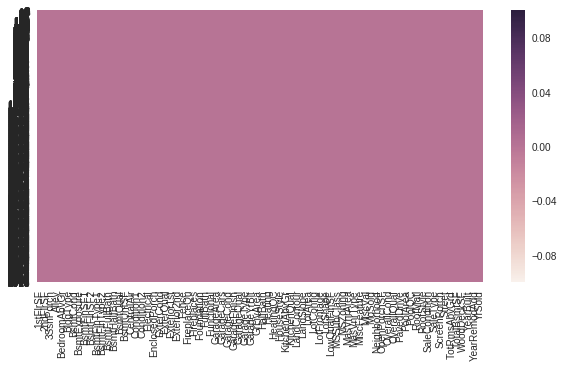

In [0]:
plt.figure(figsize=(10, 5))
sns.heatmap(all_data.isnull())

In [0]:
label_cols = ["Street", "Alley","LandSlope","ExterQual","ExterCond","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","HeatingQC","KitchenQual","Functional","FireplaceQu","GarageFinish","GarageQual","GarageCond","PavedDrive","PoolQC","Fence","LandContour","LotShape"]

In [0]:
all_data["Street"] = all_data["Street"].map({'Grvl': 0, 'Pave': 1})
all_data["Alley"] = all_data["Alley"].map({'None':0, 'Grvl': 1, 'Pave': 2})
all_data["LandSlope"] = all_data["LandSlope"].map({'Gtl': 2, 'Mod': 1, 'Sev': 0})
all_data["ExterQual"] = all_data["ExterQual"].map({'Ex': 4, 'Fa': 1, 'Gd': 3, 'Po': 0, 'TA': 2})
all_data["ExterCond"] = all_data["ExterCond"].map({'Ex': 0, 'Fa': 1, 'Gd': 2, 'None': 3, 'Po': 4, 'TA': 5})
all_data["BsmtQual"] = all_data["BsmtQual"].map({'Ex': 5, 'Fa': 2, 'Gd': 4, 'Po': 1, 'TA': 3, 'None': 0})
all_data["BsmtCond"] = all_data["BsmtCond"].map({'Ex': 5, 'Fa': 2, 'Gd': 4, 'Po': 1, 'TA': 3, 'None': 0})
all_data["BsmtExposure"] = all_data["BsmtExposure"].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0})
all_data["BsmtFinType1"] = all_data["BsmtFinType1"].map({'ALQ': 5, 'BLQ': 4, 'GLQ': 6, 'LwQ': 2, 'None': 0, 'Rec': 3, 'Unf': 1})
all_data["BsmtFinType2"] = all_data["BsmtFinType2"].map({'ALQ': 5, 'BLQ': 4, 'GLQ': 6, 'LwQ': 2, 'None': 0, 'Rec': 3, 'Unf': 1})
all_data["HeatingQC"] = all_data["HeatingQC"].map({'Ex': 4, 'Fa': 1, 'Gd': 3, 'Po': 0, 'TA': 2})
all_data["KitchenQual"] = all_data["KitchenQual"].map({'Ex': 4, 'Fa': 1, 'Gd': 3, 'TA': 2, 'Po': 0})
all_data["Functional"] = all_data["Functional"].map({'Maj1': 3, 'Maj2': 2, 'Min1': 6, 'Min2': 5, 'Mod': 4, 'Sev': 1, 'Typ': 7, 'Sal': 0})
all_data["FireplaceQu"] = all_data["FireplaceQu"].map({'Ex': 5, 'Fa': 2, 'Gd': 4, 'Po': 1, 'TA': 3, 'None': 0})
all_data["GarageFinish"] = all_data["GarageFinish"].map({'Fin': 3, 'None': 0, 'RFn': 2, 'Unf': 1})
all_data["GarageQual"] = all_data["GarageQual"].map({'Ex': 0, 'Fa': 1, 'Gd': 2, 'None': 3, 'Po': 4, 'TA': 5})
all_data["GarageCond"] = all_data["GarageCond"].map({'Ex': 0, 'Fa': 1, 'Gd': 2, 'None': 3, 'Po': 4, 'TA': 5})
all_data["PavedDrive"] = all_data["PavedDrive"].map({'N': 0, 'P': 1, 'Y': 2})
all_data["PoolQC"] = all_data["PoolQC"].map({'Ex': 4, 'Fa': 2, 'Gd': 3, 'TA': 1, 'None': 0})
all_data["Fence"] = all_data["Fence"].map({'GdPrv': 4, 'GdWo': 2, 'MnPrv': 3, 'MnWw': 1, 'None': 0})
all_data["LandContour"] = all_data["LandContour"].map({'Bnk': 0, 'HLS': 1, 'Low': 2, 'Lvl': 3})
all_data["LotShape"] = all_data["LotShape"].map({'IR1': 2, 'IR2': 1, 'IR3': 0, 'Reg': 3})

In [0]:
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

In [0]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)
# number_df = all_data.select_dtypes(include=[np.number])
# str_frame = all_data.drop(columns=list(number_df))

(2919, 215)


In [0]:

print(all_data.head())

   1stFlrSF  2ndFlrSF  3SsnPorch  Alley  BedroomAbvGr  BsmtCond  BsmtExposure  \
0       856       854          0      0             3         3             1   
1      1262         0          0      0             3         3             4   
2       920       866          0      0             3         3             2   
3       961       756          0      0             3         4             1   
4      1145      1053          0      0             4         3             3   

   BsmtFinSF1  BsmtFinSF2  BsmtFinType1     ...       SaleCondition_Partial  \
0       706.0         0.0             6     ...                           0   
1       978.0         0.0             5     ...                           0   
2       486.0         0.0             6     ...                           0   
3       216.0         0.0             5     ...                           0   
4       655.0         0.0             6     ...                           0   

   SaleType_COD  SaleType_CWD  SaleTyp

In [0]:
train_set = all_data[:ntrain]
test_set = all_data[ntrain:]

In [0]:
print(train_set.shape)
print(train_set.head())

(1460, 215)
   1stFlrSF  2ndFlrSF  3SsnPorch  Alley  BedroomAbvGr  BsmtCond  BsmtExposure  \
0       856       854          0      0             3         3             1   
1      1262         0          0      0             3         3             4   
2       920       866          0      0             3         3             2   
3       961       756          0      0             3         4             1   
4      1145      1053          0      0             4         3             3   

   BsmtFinSF1  BsmtFinSF2  BsmtFinType1     ...       SaleCondition_Partial  \
0       706.0         0.0             6     ...                           0   
1       978.0         0.0             5     ...                           0   
2       486.0         0.0             6     ...                           0   
3       216.0         0.0             5     ...                           0   
4       655.0         0.0             6     ...                           0   

   SaleType_COD  SaleType_

In [0]:
mean = train_set.mean(axis=0)
train_set -= mean
std = train_set.std(axis=0)
train_set /= std
test_set -= mean
test_set /= std

In [0]:
print(train_set.head())

   1stFlrSF  2ndFlrSF  3SsnPorch     Alley  BedroomAbvGr  BsmtCond  \
0 -0.793162  1.161454  -0.116299 -0.242942      0.163723  0.117844   
1  0.257052 -0.794891  -0.116299 -0.242942      0.163723  0.117844   
2 -0.627611  1.188943  -0.116299 -0.242942      0.163723  0.117844   
3 -0.521555  0.936955  -0.116299 -0.242942      0.163723  1.928918   
4 -0.045596  1.617323  -0.116299 -0.242942      1.389547  0.117844   

   BsmtExposure  BsmtFinSF1  BsmtFinSF2  BsmtFinType1     ...       \
0     -0.590352    0.575228   -0.288554      1.164313     ...        
1      2.220238    1.171591   -0.288554      0.689879     ...        
2      0.346511    0.092875   -0.288554      1.164313     ...        
3     -0.590352   -0.499103   -0.288554      0.689879     ...        
4      1.283375    0.463410   -0.288554      1.164313     ...        

   SaleCondition_Partial  SaleType_COD  SaleType_CWD  SaleType_Con  \
0               -0.30589     -0.174141     -0.052396     -0.037024   
1               -0

In [0]:
from keras import models
from keras import layers

def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae', 'acc'])
  return model

In [0]:
num_epochs = 100
k=4
num_val_samples = len(train_set) // k
all_scores = []

In [0]:
for i in range(k):
  print('processing fold #', i)
  val_data = train_set[i * num_val_samples: (i + 1) * num_val_samples] val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate( [train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]], axis=0)
  partial_train_targets = np.concatenate( [train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)

In [0]:
model = build_model()
model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0)
val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
all_scores.append(val_mae)

In [0]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [0]:
# sub = pd.DataFrame()
# sub['Id'] = test_ID
# sub['SalePrice'] = ensemble
# sub.to_csv('submission.csv',index=False)